# Customers segmentation

## About the dataset

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 

<font color = "#4477AA" ><b><h2><center> Dataset Features Explanation</center> </h2></b> 

|Variable|Data type	|Range	|Description|
|--------|----------|-------|-----------|
|**ID**|numerical|Integer|Shows a unique identificator of a customer|			
|**Sex**|categorical|{0,1}|Biological sex (gender) of a customer In this dataset there are only 2 different options. 0	male -1 female|
|**Marital status**|categorical|{0,1}|Marital status of a customer.0	single -1	non-single (divorced / separated / married / widowed)|
|**Age**|numerical|Integer|The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset. 18	Min value (the lowest age observed in the dataset) -76	Max value (the highest age observed in the dataset)
|**Education**|categorical|{0,1,2,3}|Level of education of the customer, 0	other / unknown - 1	high school-2	university -3	graduate school|
|**Income**|numerical|Real|Self-reported annual income in US dollars of the customer. 35832	Min value (the lowest income observed in the dataset) - 309364	Max value (the highest income observed in the dataset)|
|**Occupation**|categorical|{0,1,2}|Category of occupation of the customer. 0	unemployed / unskilled - 1	skilled employee / official -2	management / self-employed / highly qualified employee / officer
|**Settlement size**|categorical|{0,1,2}|The size of the city that the customer lives in. 0	small city - 1	mid-sized city -2	big city


# <h3>Importing libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


<h3>Loading the dataset</h3>

In [2]:
path = "segmentation data.csv"
df = pd.read_csv(path)
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.drop(["ID"], axis = 1, inplace = True)

<h3>Basic insights of dataset</h3>

In [4]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] =  summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
Sex,int64,0,0,0,0.000000,0,2,2000
Marital status,int64,0,0,0,0.000000,0,2,2000
Age,int64,0,0,0,0.000000,0,58,2000
Education,int64,0,0,0,0.000000,0,4,2000
Income,int64,0,0,0,0.000000,0,1982,2000
Occupation,int64,0,0,0,0.000000,0,3,2000
Settlement size,int64,0,0,0,0.000000,0,3,2000


In [5]:
df.shape

(2000, 7)

In [6]:
# Define categoric and numeric veriables
df_uniques = df.nunique()
categorical_variables = list(df_uniques[df_uniques <=10].index)
numeric_variables = list(set(df.columns) - set(categorical_variables))
print("Categorical variables:", categorical_variables)
print("  "*15)
print("Numeric variables:", numeric_variables)

Categorical variables: ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
                              
Numeric variables: ['Age', 'Income']


In [7]:
# lets view the unique values for eatch categoric variable
[[i, list(df[i].unique())] for i in categorical_variables]

[['Sex', [0, 1]],
 ['Marital status', [0, 1]],
 ['Education', [2, 1, 0, 3]],
 ['Occupation', [1, 0, 2]],
 ['Settlement size', [2, 0, 1]]]

### Summary Statistics

In [8]:
num_cols = df[numeric_variables]
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,35.909,11.719402,18.0,27.00,33.0,42.00,76.0
Income,2000.0,120954.419,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0


In [9]:
cat_cols = df[categorical_variables]

# This function is to view the value counts for the categorical vaiables
def value_counts(dataframe):
    for i in dataframe :
        print("\n"+ "For " + i)
        print(dataframe[i].value_counts(normalize = True))
        print("_______________________________")
print(value_counts(cat_cols))


For Sex
0    0.543
1    0.457
Name: Sex, dtype: float64
_______________________________

For Marital status
0    0.5035
1    0.4965
Name: Marital status, dtype: float64
_______________________________

For Education
1    0.6930
2    0.1455
0    0.1435
3    0.0180
Name: Education, dtype: float64
_______________________________

For Occupation
1    0.5565
0    0.3165
2    0.1270
Name: Occupation, dtype: float64
_______________________________

For Settlement size
0    0.4945
1    0.2720
2    0.2335
Name: Settlement size, dtype: float64
_______________________________
None


## EDA

### Distribution of categorical variables

In [10]:
def plot_bar(df, cols):
    fig, axes = plt.subplots(2, 3, figsize=(10, 6), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        counts.plot.bar(ax = axes[i],color= "#4477DA")
        axes[i].set_title("Distibution of " + col)
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

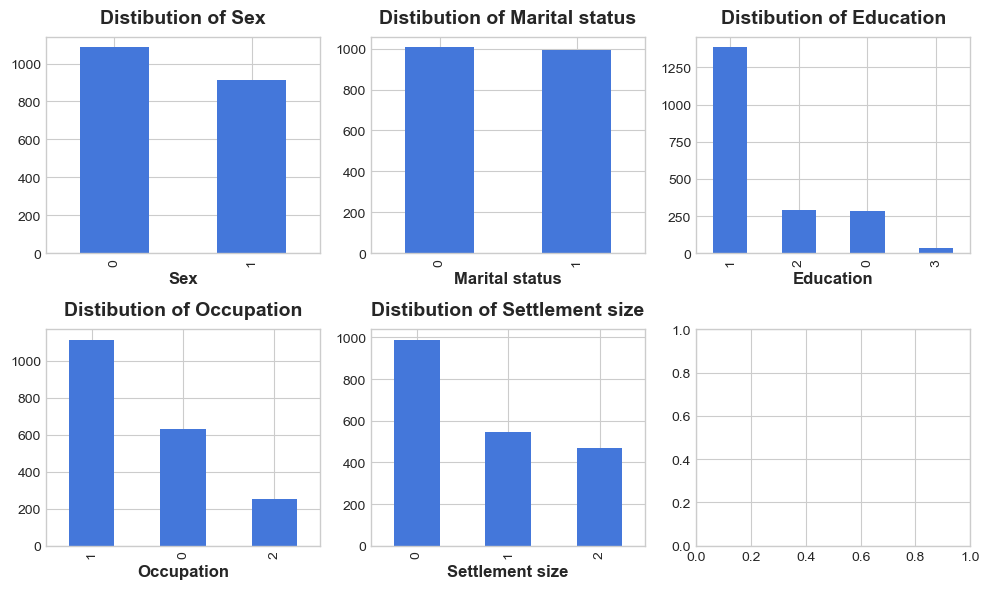

In [11]:
plot_bar(df, categorical_variables)

### Distribution of numerical variables

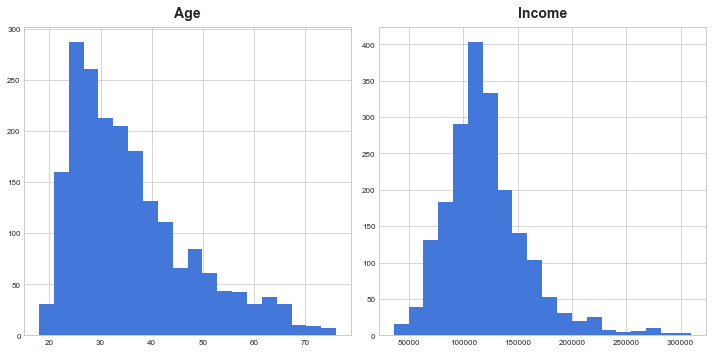

In [12]:
num = df[numeric_variables]
num.hist(figsize=(10, 5), bins=20, xlabelsize=8, ylabelsize=8,color = "#4477DA");

## Features Engneering

### create new features

In [21]:
# mean income by occubation
df["In_Occu"] = (
    df.groupby("Occupation")  # for each occupation
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)
df[["Occupation","Income","In_Occu"]].head(10)

,Occupation,Income,In_Occu
0,1,124670,125474.473495
1,1,150773,125474.473495
2,0,89210,90837.232227
3,1,171565,125474.473495
4,1,149031,125474.473495
5,0,144848,90837.232227
6,1,156495,125474.473495
7,2,193621,176203.862205
8,0,151591,90837.232227
9,2,174646,176203.862205


In [20]:
# mean income by education
df["In_Edu"] = (
    df.groupby('Education')  # for each Education
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)
df[['Education',"Income","In_Edu"]].head(10)

,Education,Income,In_Edu
0,2,124670,145405.982818
1,1,150773,116367.720058
2,1,89210,116367.720058
3,1,171565,116367.720058
4,1,149031,116367.720058
5,1,144848,116367.720058
6,1,156495,116367.720058
7,1,193621,116367.720058
8,2,151591,145405.982818
9,1,174646,116367.720058


In [22]:
# mean income by Settlement size
df["In_Sett"] = (
    df.groupby('Settlement size')  # for each Settlement size
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)
df[['Settlement size',"Income","In_Sett"]].head(10)

,Settlement size,Income,In_Sett
0,2,124670,143889.985011
1,2,150773,143889.985011
2,0,89210,101061.787664
3,1,171565,137430.343750
4,1,149031,137430.343750
5,0,144848,101061.787664
6,1,156495,137430.343750
7,1,193621,137430.343750
8,0,151591,101061.787664
9,0,174646,101061.787664


In [24]:
# mean income by Marital status
df["In_Mari"] = (
    df.groupby('Marital status')  # for each Marital status
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)
df[['Marital status',"Income","In_Mari"]].head(10)

,Marital status,Income,In_Mari
0,0,124670,123736.232373
1,1,150773,118133.385700
2,0,89210,123736.232373
3,0,171565,123736.232373
4,0,149031,123736.232373
5,0,144848,123736.232373
6,0,156495,123736.232373
7,0,193621,123736.232373
8,1,151591,118133.385700
9,1,174646,118133.385700


In [27]:
df.shape

(2000, 11)

## Feature Importance Analysis

In [25]:
y = df[['Income']]
x = df.drop(['Income'], axis = 1)

### Featuer importance using chi2

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

ordered = f_Scores.nlargest(10,'Score')
ordered

,Feature,Score
6,In_Occu,1.132450e+07
8,In_Sett,6.435544e+06
7,In_Edu,1.953817e+06
9,In_Mari,1.293718e+05
2,Age,7.488636e+03
5,Settlement size,1.764896e+03
0,Sex,1.076153e+03
1,Marital status,1.003979e+03
4,Occupation,1.003923e+03
3,Education,6.913410e+02


### Featuer importance using Mutual Information Scores

In [29]:
discrete_features = x.dtypes == int

In [30]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(x,y,discrete_features):
    mi_scores = mutual_info_regression(x,y,discrete_features =discrete_features )
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = x.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores =  make_mi_scores(x,y,discrete_features) 
mi_scores

Occupation         0.389675
In_Occu            0.389675
Settlement size    0.214521
In_Sett            0.213564
Age                0.158488
Education          0.084996
In_Edu             0.084810
Sex                0.039533
Marital status     0.023701
In_Mari            0.023701
Name: MI Scores, dtype: float64

### Outliers detection

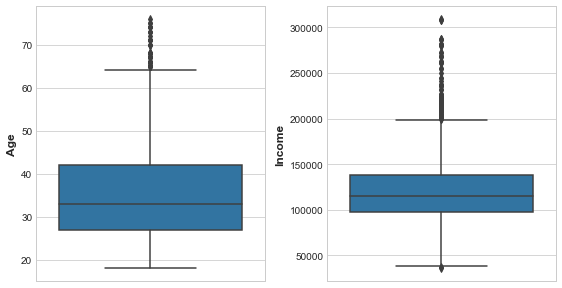

In [13]:
numeric = df[numeric_variables]
# boxplots of numerical features for outlier detection

fig = plt.figure(figsize=(16,16))
for i in range(len(numeric.columns)):
    fig.add_subplot(4, 4, i+1)
    sns.boxplot(y=numeric.iloc[:,i])
plt.tight_layout()
plt.show()

In [31]:
df.shape

(2000, 11)

## Data preprocessing - Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns = df.columns)
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.0,1.0,-0.917,-0.917,-0.917,1.090,1.090
Marital status,2000.0,0.0,1.0,-0.993,-0.993,-0.993,1.007,1.007
Age,2000.0,0.0,1.0,-1.529,-0.760,-0.248,0.520,3.422
Education,2000.0,-0.0,1.0,-1.731,-0.063,-0.063,-0.063,3.272
Income,2000.0,0.0,1.0,-2.234,-0.611,-0.142,0.449,4.945
Occupation,2000.0,0.0,1.0,-1.270,-1.270,0.297,0.297,1.863
Settlement size,2000.0,-0.0,1.0,-0.910,-0.910,0.321,0.321,1.552
In_Occu,2000.0,-0.0,1.0,-1.150,-1.150,0.173,0.173,2.109
In_Edu,2000.0,-0.0,1.0,-0.541,-0.421,-0.421,-0.421,2.375
In_Sett,2000.0,0.0,1.0,-1.004,-1.004,0.832,0.832,1.158


## K-means clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


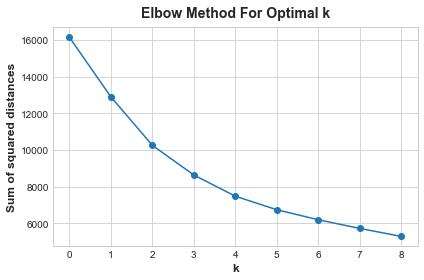

In [34]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(ssd, marker = "o")
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show();

In [35]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.26088821949577345
For n_clusters=3, the silhouette score is 0.28821923163411794
For n_clusters=4, the silhouette score is 0.31164023574698824
For n_clusters=5, the silhouette score is 0.33205810831377297
For n_clusters=6, the silhouette score is 0.3553953003514472
For n_clusters=7, the silhouette score is 0.35205202413226083
For n_clusters=8, the silhouette score is 0.3627435137170025


In [47]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
labels =kmeans.fit_predict(df)


In [48]:
# assign the label
df['Cluster'] = kmeans.labels_
df.head()

,index,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,In_Occu,In_Edu,In_Sett,In_Mari,Cluster
0,0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0.172562,2.245405,1.157907,0.993024,2
1,1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0.172562,-0.421200,1.157907,-1.007025,2
2,2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,-1.149781,-0.421200,-1.004283,0.993024,2
3,3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0.172562,-0.421200,0.831790,0.993024,2
4,4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0.172562,-0.421200,0.831790,0.993024,2


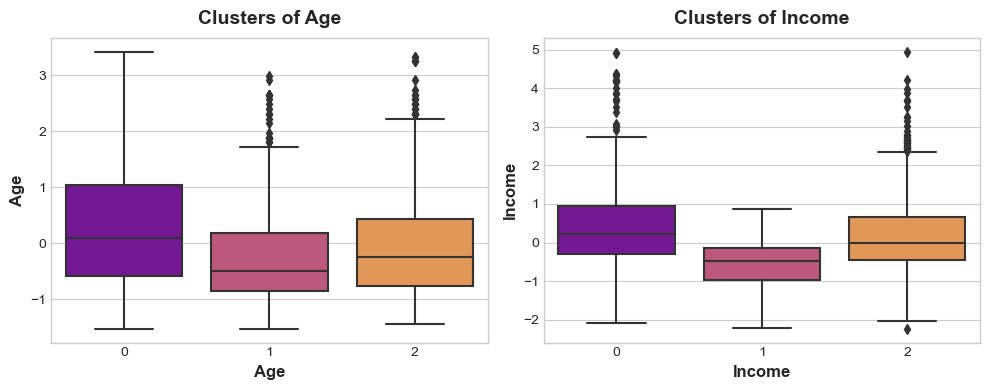

In [49]:
num = df[numeric_variables]
def plot_box(df, cols, col_x = 'Cluster' ):
    fig, axes = plt.subplots(1, 2, figsize=(10,4), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot( col_x, col,ax = axes[i], data = df,  palette='plasma')
        axes[i].set_title("Clusters of " + col)
        axes[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()
plot_box(df, num )

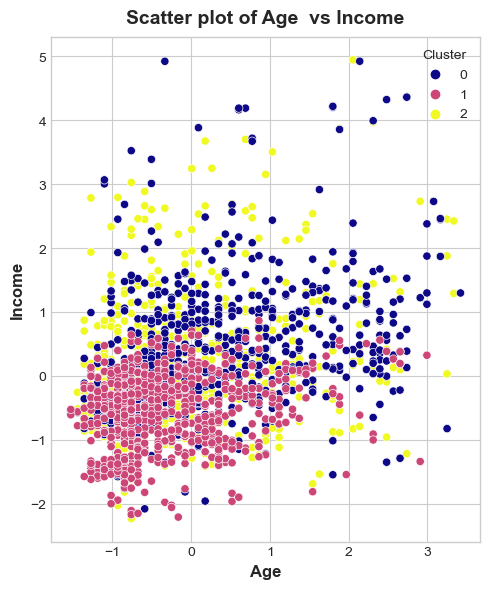

In [51]:

fig, axes = plt.subplots(1, 1, figsize=(5, 6), dpi=100)
sns.scatterplot(x="Age", y='Income', data=df,hue='Cluster',palette='plasma')
plt.title("Scatter plot of Age  vs Income")
plt.tight_layout()
plt.show()

### Visulalizing the clusters

In [52]:
df= df.reset_index()

In [53]:
y = df["Cluster"]
X = df.drop(["Cluster"], axis=1)

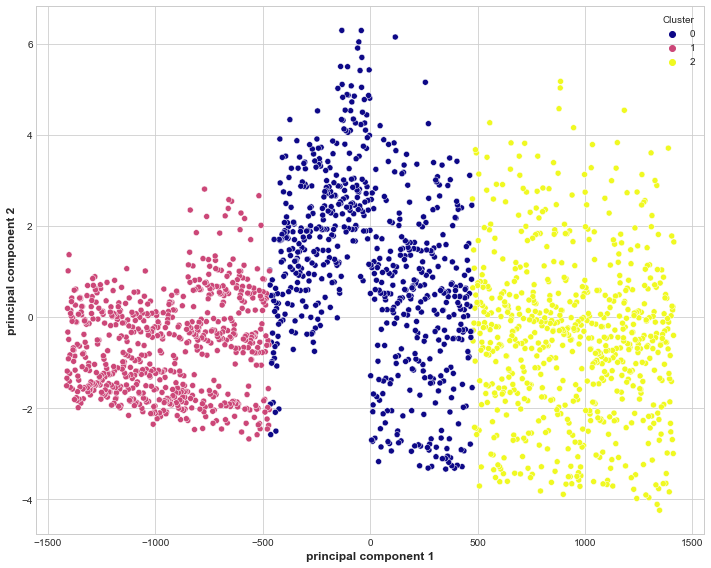

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pca_fit, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
pca_df['Cluster'] = final_df['Cluster']
plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_df, x='principal component 1', y='principal component 2', hue='Cluster', palette='plasma')
plt.show()

## Hierarchical  Clustering

In [55]:

from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_labels=hc.fit_predict(final_df)

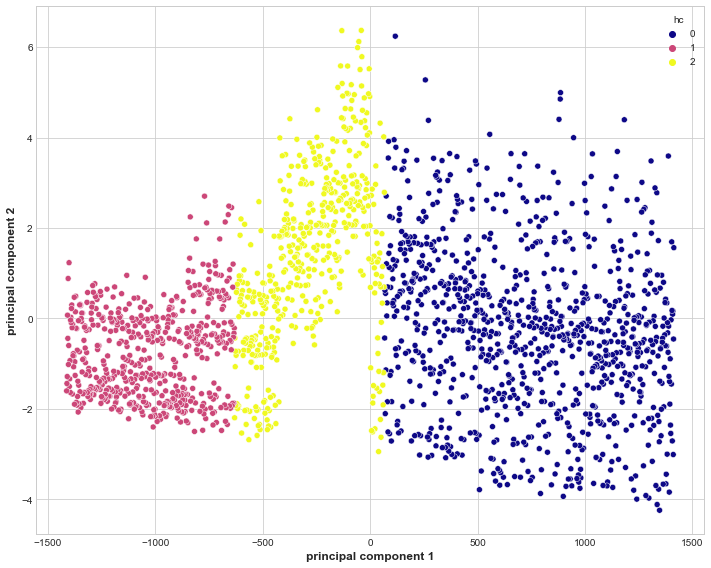

In [56]:
df_hc = pd.concat([final_df, pd.DataFrame({'hc':hc_labels})], axis = 1)
df_hc.head()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['hc'] = df_hc['hc']
plt.figure(figsize=(10,8))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='hc', palette='plasma')
plt.show()

## Results

In [57]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
print("Silhouette Score (KMeans): ", metrics.silhouette_score(final_df, labels))
print("Calinski-Harabasz Index (KMeans): ", metrics.calinski_harabasz_score(final_df, labels))
print("Davies-Bouldin Index (KMeans): ", metrics.davies_bouldin_score(final_df, labels))
print("  ")
print("_"*70)
print("  ")
print("Silhouette Score (Hierarchical Clustering):", silhouette_score(final_df, hc.labels_))
print("Calinski-Harabasz Index (Hierarchical Clustering):", calinski_harabasz_score(final_df, hc.labels_))
print("Davies-Bouldin Index (Hierarchical Clustering):", davies_bouldin_score(final_df, hc.labels_))


Silhouette Score (KMeans):  0.5895625823684469
Calinski-Harabasz Index (KMeans):  7987.50452903489
Davies-Bouldin Index (KMeans):  0.5000518608745094
  
______________________________________________________________________
  
Silhouette Score (Hierarchical Clustering): 0.5447753666260993
Calinski-Harabasz Index (Hierarchical Clustering): 5916.2081620693325
Davies-Bouldin Index (Hierarchical Clustering): 0.5000370507687776


# **Conclusion:**
* If emphasizing silhouette score, suggesting better-defined clusters, K-means Clustering might be preferred.
* If focusing on the Calinski-Harabasz Index, indicating cohesive and separated clusters, KMeans appears to performs better.
* For Davies-Bouldin Index, both algorthms have neary the same value, indicating the same cluster quality in terms of separation and compactness.

---
# END
Thank you :)